Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [25]:
data = pd.read_csv("C:/Users/Godwin/Downloads/Califonia Data/Califonia Housing Data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Checking for null Values

In [26]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Visualizing relationship between numerical columns and target variable

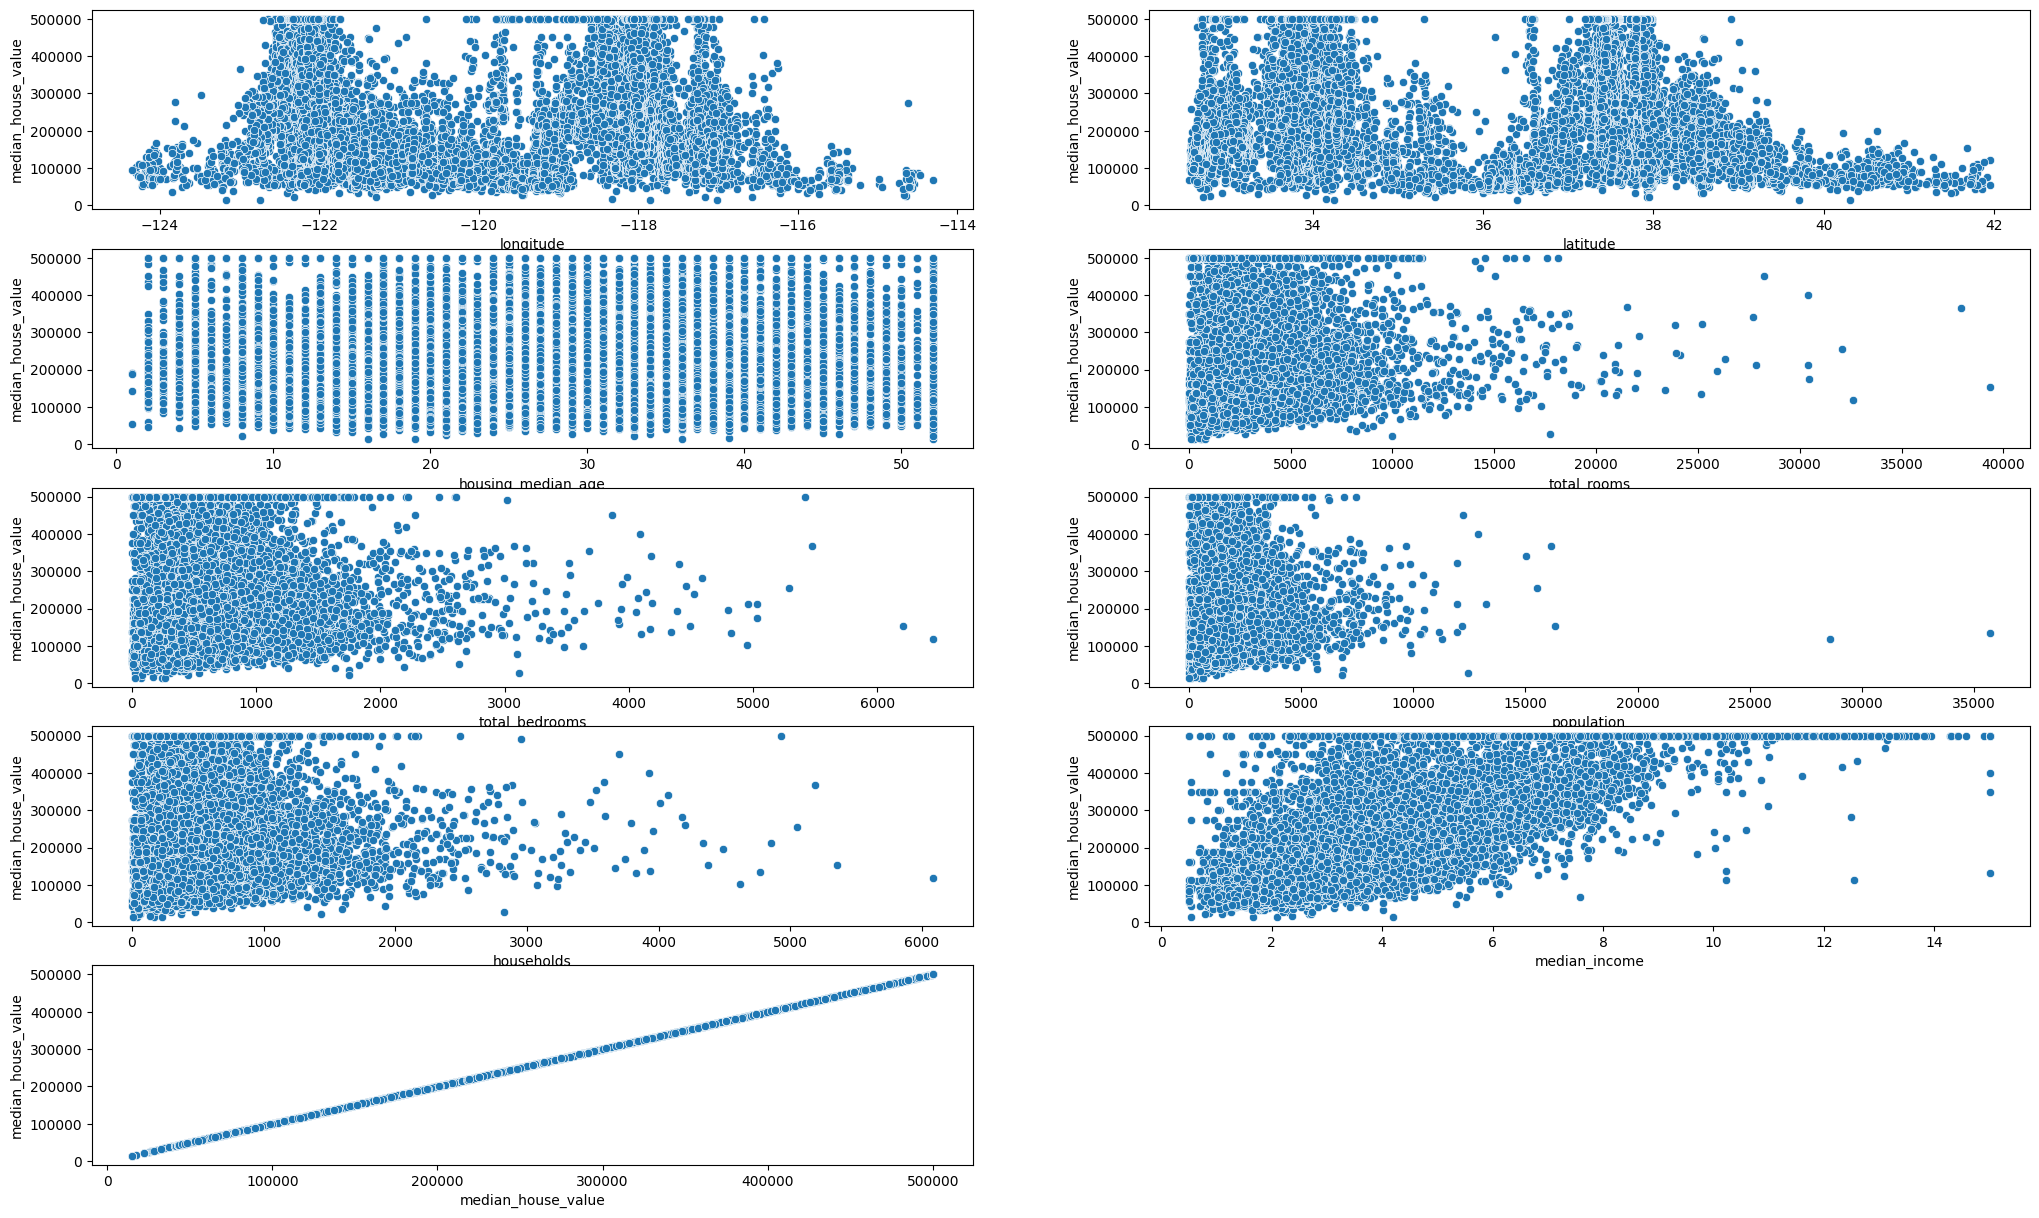

In [4]:
numerical_col = data.dtypes[data.dtypes != 'object'].index.tolist()


plt.figure(figsize=(25,15))
rows = int(len(numerical_col)/2 +1)
for i,col in enumerate(numerical_col):
    plt.subplot(rows, 2, i+1)
    sns.scatterplot(x = col, y = 'median_house_value', data = data )


The median_house_value and median_income are positively correlated

Plotting correlation with heat map

<AxesSubplot: >

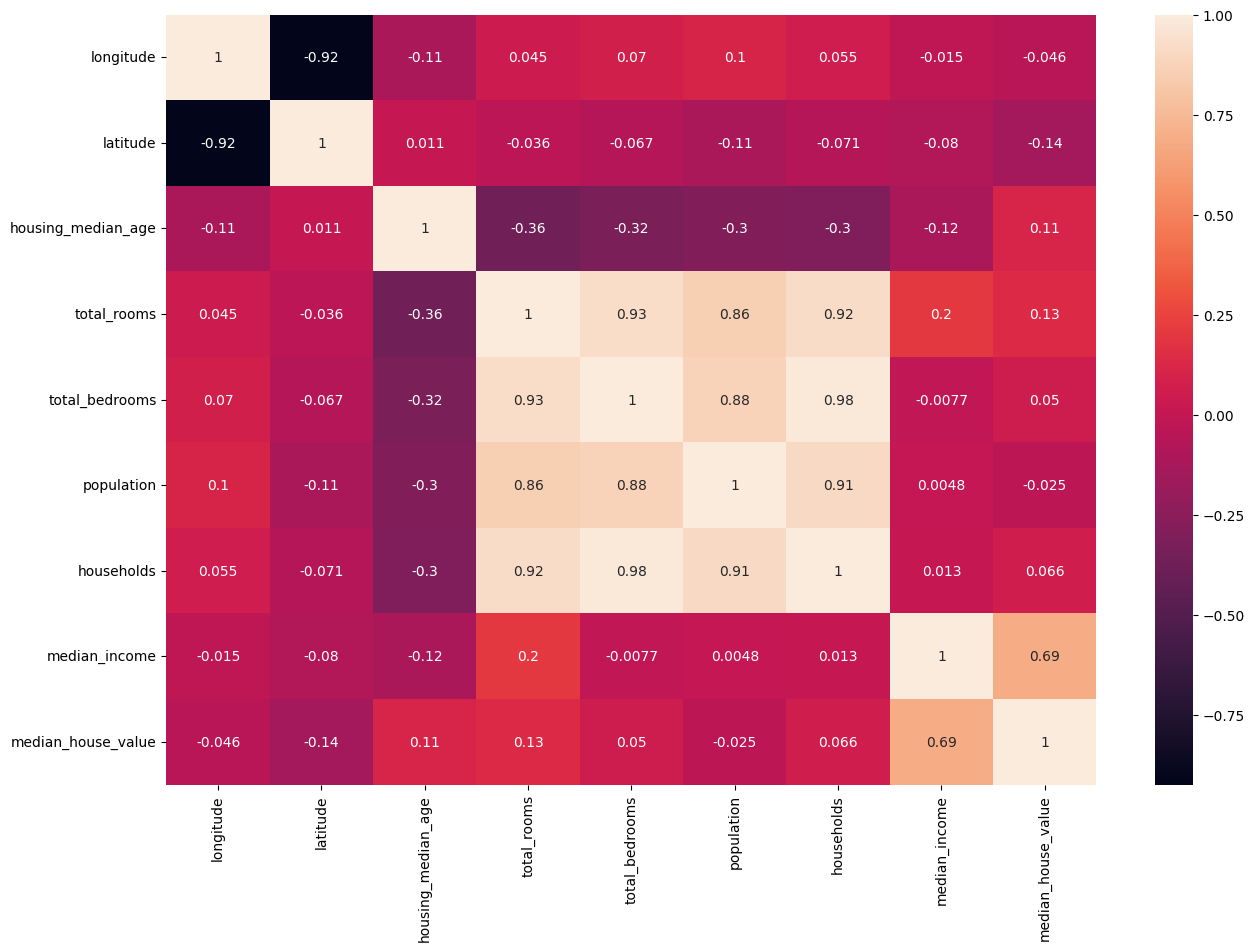

In [35]:
plt.figure(figsize=(15,10))
corr = data.corr(method = 'pearson')
sns.heatmap(corr, annot = True)

Visualizing Categorical variable and the target variable

<AxesSubplot: xlabel='ocean_proximity', ylabel='median_house_value'>

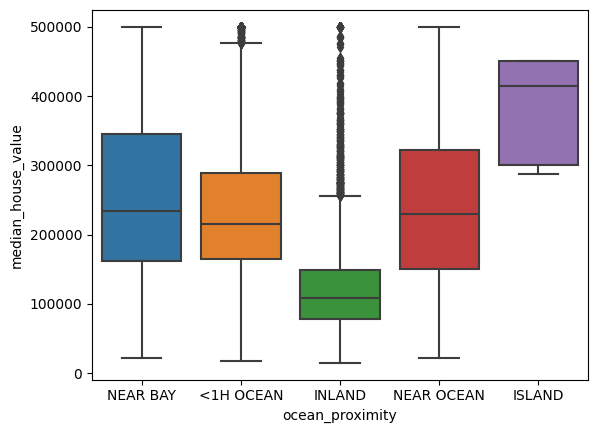

In [36]:
sns.boxplot(x = 'ocean_proximity', y = 'median_house_value', data = data)

Houses on the Island are more expensive compared to the other houses and inland houses are also relatively cheap compared with the others

Ploting target variable distribution

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

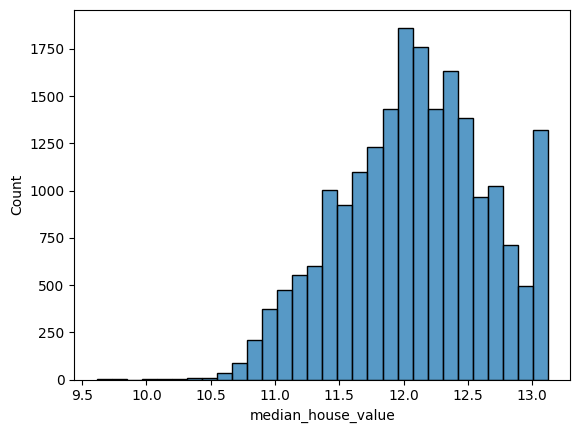

In [37]:
sns.histplot(np.log1p(data['median_house_value']), bins = 30)

In [38]:
#Dropping categorical Column
data.drop(['ocean_proximity'], axis = 1, inplace = True)

In [39]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

This shows that the total_bedrooms has a total missing value of 207

In [41]:
data['population'].median()

1166.0

The median of the population column is 1166.0

Splitting Dataset

In [43]:
def splitting_data(df):

    df = df.copy()
        
    n = len(df)
    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - n_test - n_val

    np.random.seed(42)
    idx = np.arange(n)
    np.random.shuffle(idx)

    train_df = df.iloc[idx[:n_train]]
    test_df = df.iloc[idx[n_train: n_train + n_test]]
    val_df = df.iloc[idx[n_train + n_test: ]]

    y_train = np.log1p(train_df['median_house_value'])
    y_test = np.log1p(test_df['median_house_value'])
    y_val = np.log1p(val_df['median_house_value'])

    del train_df['median_house_value']
    del test_df['median_house_value']
    del val_df['median_house_value']

    #Filling missing values with 0
    train_df.fillna(0, inplace = True)
    test_df.fillna(0, inplace = True)
    val_df.fillna(0, inplace = True)

    return train_df,y_train, test_df,y_test, val_df, y_val

Building Model

In [42]:
def linear_regression(data, result):
    ones = np.ones(data.shape[0])
    data = np.column_stack([ones, data])

    XTX = np.dot(data.T, data)
    inverse = np.linalg.inv(XTX)
    w = np.dot(inverse,data.T)
    w = np.dot(w,result)
    return w[0], w[1:]

def rms(actual, predicted):
    rms = actual - predicted
    rms = np.square(rms)
    rms = rms.mean()

    return np.sqrt(rms)

In [44]:
def splitting_data_mean(df):

    df = df.copy()
        
    n = len(df)
    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - n_test - n_val

    np.random.seed(42)
    idx = np.arange(n)
    np.random.shuffle(idx)

    train_df = df.iloc[idx[:n_train]]
    test_df = df.iloc[idx[n_train: n_train + n_test]]
    val_df = df.iloc[idx[n_train + n_test: ]]

    y_train = np.log1p(train_df['median_house_value'])
    y_test = np.log1p(test_df['median_house_value'])
    y_val = np.log1p(val_df['median_house_value'])

    del train_df['median_house_value']
    del test_df['median_house_value']
    del val_df['median_house_value']


    #Filling data with mean
    mean = train_df['total_bedrooms'].mean()
    train_df.fillna(mean, inplace = True)
    test_df.fillna(mean, inplace = True)
    val_df.fillna(mean, inplace = True)

    return train_df,y_train, test_df,y_test, val_df, y_val

Checking Performance when filled with 0

In [45]:
train_df,y_train, test_df,y_test, val_df, y_val = splitting_data(data)

bias, w = linear_regression(train_df, y_train)
predict = bias + val_df.dot(w)
print("The value of the root mean squared error without regulazation is ", round(rms(y_val, predict),2))

The value of the root mean squared error without regulazation is  0.35


Checking Performance when filled the with mean

In [46]:
train_df,y_train, test_df,y_test, val_df, y_val = splitting_data_mean(data)

bias, w = linear_regression(train_df, y_train)
predict = bias + val_df.dot(w)
print("The value of the root mean squared error without regulazation is ", round(rms(y_val, predict),2))

The value of the root mean squared error without regulazation is  0.35


Building model with Regularization

In [48]:
def linear_regression_regularised(x_train, result, r):
    ones = np.ones(x_train.shape[0])
    data = np.column_stack([ones, x_train])

    XTX = np.dot(data.T, data)
    XTZ = XTX + r * np.eye(XTX.shape[0])
    inverse = np.linalg.inv(XTX)
    out = np.dot(inverse,data.T)
    w = np.dot(out,result)
    return w[0], w[1:]

Checking performance of model with regularization

In [49]:
train_df,y_train, test_df,y_test, val_df, y_val = splitting_data_mean(data)

#Using different regularization parameters
regularization_parameters = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for i in regularization_parameters:
    bias, w = linear_regression_regularised(train_df, y_train, i)
    predict = bias + val_df.dot(w)
    print("The value of the root mean squared error with ", i, "regularization is ", round(rms(y_val, predict),2))


The value of the root mean squared error with  0 regularization is  0.35
The value of the root mean squared error with  1e-06 regularization is  0.35
The value of the root mean squared error with  0.0001 regularization is  0.35
The value of the root mean squared error with  0.001 regularization is  0.35
The value of the root mean squared error with  0.01 regularization is  0.35
The value of the root mean squared error with  0.1 regularization is  0.35
The value of the root mean squared error with  1 regularization is  0.35
The value of the root mean squared error with  5 regularization is  0.35
The value of the root mean squared error with  10 regularization is  0.35


Using different seed and computing the Standard Deviation

In [50]:
def all_in_one(df, seed_value):

   df = df.copy()
      
   n = len(df)
   n_test = int(n * 0.2)
   n_val = int(n * 0.2)
   n_train = n - n_test - n_val

   np.random.seed(seed_value)
   idx = np.arange(n)
   np.random.shuffle(idx)

   train_df = df.iloc[idx[:n_train]]
   test_df = df.iloc[idx[n_train: n_train + n_test]]
   val_df = df.iloc[idx[n_train + n_test: ]]

   y_train = np.log1p(train_df['median_house_value'])
   y_test = np.log1p(test_df['median_house_value'])
   y_val = np.log1p(val_df['median_house_value'])

   del train_df['median_house_value']
   del test_df['median_house_value']
   del val_df['median_house_value']

   train_df.fillna(0, inplace = True)
   test_df.fillna(0, inplace = True)
   val_df.fillna(0, inplace = True)

   bias, w = linear_regression(train_df, y_train)
   predict = bias + val_df.dot(w)
   return round(rms(y_val, predict),2)

In [21]:
#List of seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
error = []
for i in seeds:
    error.append(all_in_one(data, i))

std = round(np.std(error),3)
print('The standard deviation for the error using diggerent seed is ', std)

The standard deviation for the error using diggerent seed is  0.005


Using seed value of 9

In [23]:
def all_in_one(df, seed_value):

   df = df.copy()
      
   n = len(df)
   n_test = int(n * 0.2)
   n_val = int(n * 0.2)
   n_train = n - n_test - n_val

   np.random.seed(seed_value)
   idx = np.arange(n)
   np.random.seed(seed_value)
   np.random.shuffle(idx)

   train_df = df.iloc[idx[:n_train]]
   test_df = df.iloc[idx[n_train: n_train + n_test]]
   val_df = df.iloc[idx[n_train + n_test: ]]

   y_train = np.log1p(train_df['median_house_value'])
   y_test = np.log1p(test_df['median_house_value'])
   y_val = np.log1p(val_df['median_house_value'])

   del train_df['median_house_value']
   del test_df['median_house_value']
   del val_df['median_house_value']

   train_df.fillna(0, inplace = True)
   test_df.fillna(0, inplace = True)
   val_df.fillna(0, inplace = True)

   r = 0.001
   bias, w = linear_regression_regularised(train_df, y_train, r)
   predict = bias + test_df.dot(w)

   return round(rms(y_test, predict), 3)

error = all_in_one(data, 9)
print('The root mean squared error on the predicted data using a seed of 9 is ', error)

The root mean squared error on the predicted data using a seed of 9 is  0.337
